In [45]:
# Importing modules
import pandas as pd

# Reading in datasets/book1.csv
book1 = pd.read_csv('C:/Users/phoen/Documents/DataMining/input/book1.csv')

# Printing out the head of the dataset
print(book1.head())

# variable to hold the count
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(book1['Target'])):
    
    if book1['Target'][i] not in visited: 
        
        visited.append(book1['Target'][i])
          
        cnt += 1
        
for i in range(0, len(book1['Source'])):
    
    if book1['Source'][i] not in visited: 
        
        visited.append(book1['Source'][i])
          
        cnt += 1
  
print("No of unique Sources & Targets :",
      cnt)
  
print("unique Targets :",
      visited)

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  
No of unique Sources & Targets : 187
unique Targets : ['Jaime-Lannister', 'Tywin-Lannister', 'Daenerys-Targaryen', 'Eddard-Stark', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Jeor-Mormont', 'Jon-Snow', 'Samwell-Tarly', 'Brandon-Stark', 'Gerold-Hightower', 'Jon-Arryn', 'Robert-Baratheon', 'Drogo', 'Jhogo', 'Jorah-Mormont', 'Quaro', 'Rakharo', 'Halder', 'Rast', 'Grenn', 'Pypar', 'Tyrion-Lannister', 'Harwin', 'Jory-Cassel', 'Tomard', 'Benjen-Stark', 'Bran-Stark

In [7]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

In [9]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['C:/Users/phoen/Documents/DataMining/input/book2.csv', 'C:/Users/phoen/Documents/DataMining/input/book3.csv', 'C:/Users/phoen/Documents/DataMining/input/book4.csv', 'C:/Users/phoen/Documents/DataMining/input/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [10]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


<AxesSubplot:>

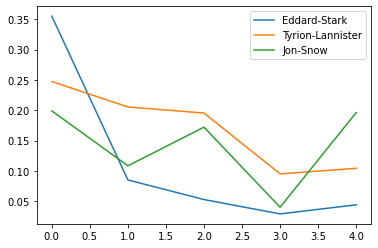

In [11]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

<AxesSubplot:>

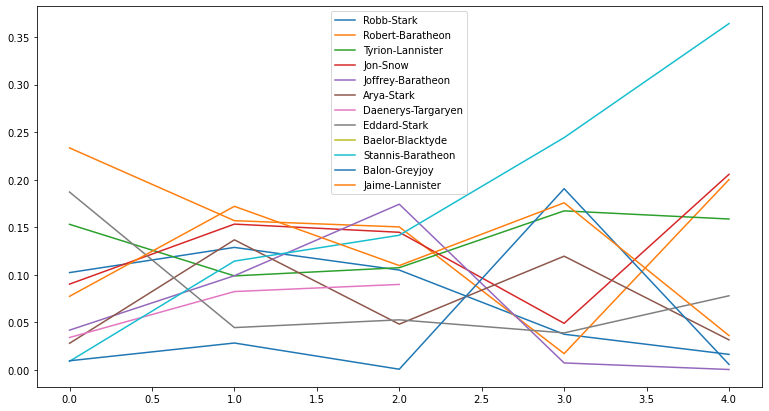

In [12]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

<AxesSubplot:>

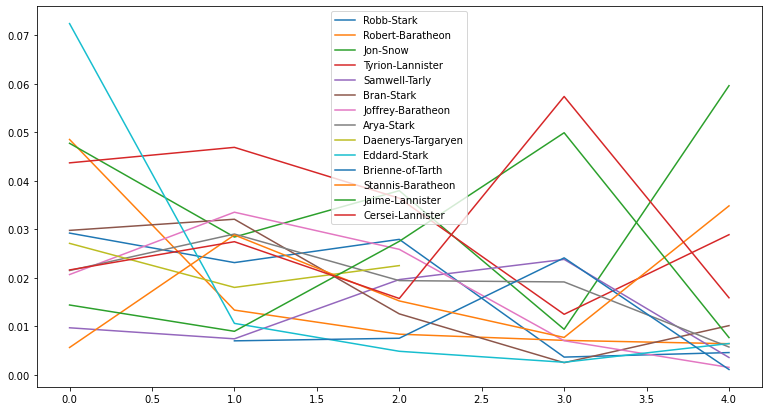

In [13]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

In [14]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [15]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank, b_cent)

Jon-Snow Stannis-Baratheon


In [29]:
import pandas as pd
df=pd.read_csv('input/owid-covid-data.csv')
df.head()
#df.tail()
#len(df)
#df.dtypes

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [27]:
len(df. columns)

59